### Imports needed

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sms-spam-collection-dataset/spam.csv


### Reading the csv file and renaming columns

In [82]:
sms = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding='latin-1')
sms = sms.rename(columns={'v1': 'class', 'v2': 'text'})
sms.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

### Adding length of each message as a new column

In [83]:
sms['length'] = sms['text'].apply(len)

In [84]:
sms.head(3)

,class,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155


### Countplot to compare the number of spam vs non-spam messages

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='class', ylabel='count'>

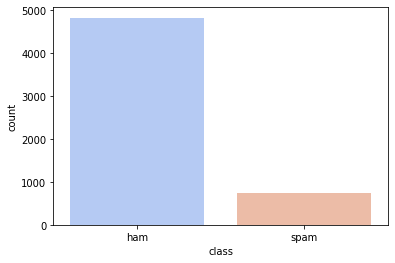

In [85]:
sns.countplot(sms['class'],palette='coolwarm')

### Barplot to compare the average length of a spam vs non-spam message

<AxesSubplot:xlabel='class', ylabel='length'>

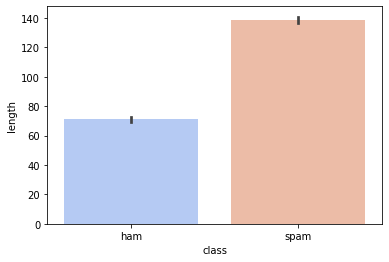

In [86]:
sns.barplot(x='class',y='length',data=sms,palette='coolwarm')

#### We can notice that spam messages tend to be longer than non-spam messages

# NLP Preprocessing

### Remove punctuations - Remove stop words - Return a clean message

In [87]:
def clean(sms):
    nopunc = [word for word in sms if word not in string.punctuation]
    nopunc = ''.join(nopunc)
    m = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return m

In [88]:
cv = CountVectorizer(analyzer = clean).fit(sms['text'])

In [89]:
cvt = cv.transform(sms['text'])

# Term frequency | Inverse document frequency transform

In [90]:
from sklearn.feature_extraction.text import TfidfTransformer

In [91]:
tfidf_transformer = TfidfTransformer().fit(cvt)
messages_tfidf = tfidf_transformer.transform(cvt)

# Train Test Split

In [92]:
X = sms['text']
y = sms['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Naive Bayes

### Creating Pipeline

In [93]:
nbpl = Pipeline([
    ('cv', CountVectorizer(analyzer=clean)),
    ('transform', TfidfTransformer()), 
    ('alg', MultinomialNB()),
])

### Training Naive Bayes

In [94]:
nbpl.fit(X_train,y_train)
nbpred = nbpl.predict(X_test)

### Evaluation

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1470
        spam       1.00      0.74      0.85       202

    accuracy                           0.97      1672
   macro avg       0.98      0.87      0.92      1672
weighted avg       0.97      0.97      0.97      1672


 confusion matrix


<AxesSubplot:>

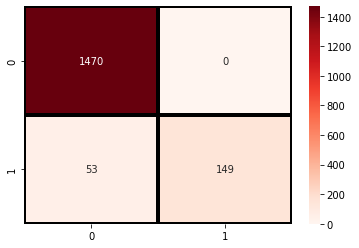

In [95]:
print(classification_report(y_test,nbpred))
print('\n confusion matrix')
sns.heatmap(confusion_matrix(y_test,nbpred),annot=True,fmt='g',cmap='Reds',linecolor='black',linewidths=4)

# Random Forest Classifier

### Creating pipeline

In [96]:
rfcpl = Pipeline([
    ('cv', CountVectorizer(analyzer=clean)),
    ('transform', TfidfTransformer()), 
    ('alg', RandomForestClassifier(n_estimators=100)),
])

### Training RFC

In [97]:
rfcpl.fit(X_train,y_train)
rfcpred = rfcpl.predict(X_test)

### Evaluation

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1470
        spam       1.00      0.79      0.88       202

    accuracy                           0.97      1672
   macro avg       0.99      0.90      0.93      1672
weighted avg       0.98      0.97      0.97      1672


 confusion matrix


<AxesSubplot:>

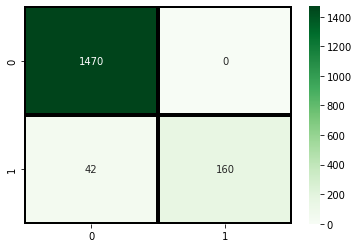

In [98]:
print(classification_report(y_test,rfcpred))
print('\n confusion matrix')
sns.heatmap(confusion_matrix(y_test,rfcpred),annot=True,fmt='g',cmap='Greens',linecolor='black',linewidths=4)

# Logistic Regression

### Creating pipeline

In [99]:
lrpl = Pipeline([
    ('cv', CountVectorizer(analyzer=clean)),
    ('transform', TfidfTransformer()), 
    ('alg', LogisticRegression()),
])

### Training Logistic Regression

In [100]:
lrpl.fit(X_train,y_train)
lrpred = lrpl.predict(X_test)

### Evaluation

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1470
        spam       0.98      0.68      0.80       202

    accuracy                           0.96      1672
   macro avg       0.97      0.84      0.89      1672
weighted avg       0.96      0.96      0.96      1672


 confusion matrix


<AxesSubplot:>

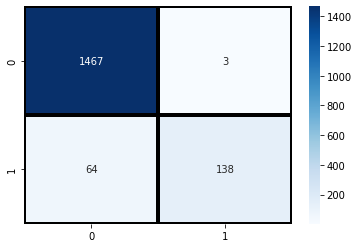

In [101]:
print(classification_report(y_test,lrpred))
print('\n confusion matrix')
sns.heatmap(confusion_matrix(y_test,lrpred),annot=True,fmt='g',cmap='Blues',linecolor='black',linewidths=4)

### Thank you !, feel free to add any comments or questions.